In [3]:
!pip install kaggle --quiet


In [4]:
!kaggle datasets download -d kritikseth/fruit-and-vegetable-image-recognition


Dataset URL: https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition
License(s): CC0-1.0
100% 1.98G/1.98G [00:39<00:00, 77.7MB/s]
100% 1.98G/1.98G [00:39<00:00, 53.5MB/s]


In [5]:
import zipfile

with zipfile.ZipFile("fruit-and-vegetable-image-recognition.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/")


In [18]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pathlib import Path


In [19]:
train_dir = "/content/train"
val_dir   = "/content/validation"
test_dir  = "/content/test"


# Data Preprocessing


# Training Image preprocessing

In [20]:
img_size = (224, 224)
batch = 32

train_ds_raw = tf.keras.utils.image_dataset_from_directory(
    train_dir, label_mode="int", image_size=img_size, shuffle=True)



Found 3115 files belonging to 36 classes.


# Validation Image Preprocessing


In [21]:
val_ds_raw = tf.keras.utils.image_dataset_from_directory(
    val_dir, label_mode="int", image_size=img_size, shuffle=False)


Found 351 files belonging to 36 classes.


In [22]:
test_ds_raw = tf.keras.utils.image_dataset_from_directory(
    test_dir, label_mode="int", image_size=img_size, shuffle=False)

Found 359 files belonging to 36 classes.


In [23]:
class_names = train_ds_raw.class_names
num_classes = len(class_names)
class_names

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

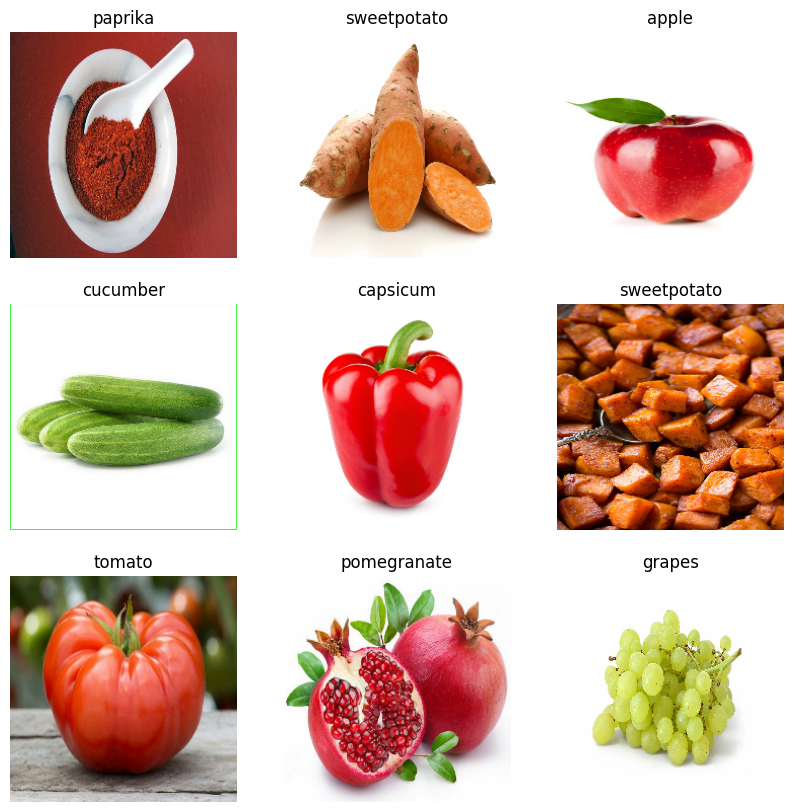

In [24]:
plt.figure(figsize=(10,10))
for images, labels in train_ds_raw.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")


# normalize+prefetch

In [25]:
train_ds = train_ds_raw.map(lambda x, y: (x/255.0, y)).cache().prefetch(tf.data.AUTOTUNE)
val_ds   = val_ds_raw.map(lambda x, y: (x/255.0, y)).cache().prefetch(tf.data.AUTOTUNE)
test_ds  = test_ds_raw.map(lambda x, y: (x/255.0, y)).cache().prefetch(tf.data.AUTOTUNE)



# Building Model

In [26]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(224,224,3)),

    tf.keras.layers.Conv2D(16, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(16, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 109, 109, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 52, 52, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 26, 26, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 10816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │     2,769,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 36)             │         9,252 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,788,116 (10.64 MB)

 Trainable params: 2,788,116 (10.64 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20
)


Epoch 1/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 67s 606ms/step - accuracy: 0.0530 - loss: 3.4753 - val_accuracy: 0.2507 - val_loss: 2.6504
Epoch 2/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 18s 25ms/step - accuracy: 0.2197 - loss: 2.7013 - val_accuracy: 0.5556 - val_loss: 1.5851
Epoch 3/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.4107 - loss: 2.0419 - val_accuracy: 0.7208 - val_loss: 0.9682
Epoch 4/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.5841 - loss: 1.4317 - val_accuracy: 0.8205 - val_loss: 0.6780
Epoch 5/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.7507 - loss: 0.8617 - val_accuracy: 0.8405 - val_loss: 0.6993
Epoch 6/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.8236 - loss: 0.5555 - val_accuracy: 0.9202 - val_loss: 0.4893
Epoch 7/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9052 - loss: 0.3375 - val_accuracy: 0.9316 - val_loss: 0.4546
Epoch 8/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9298 - loss: 0.2437 - val_accuracy: 0.9373 

## Training Curves


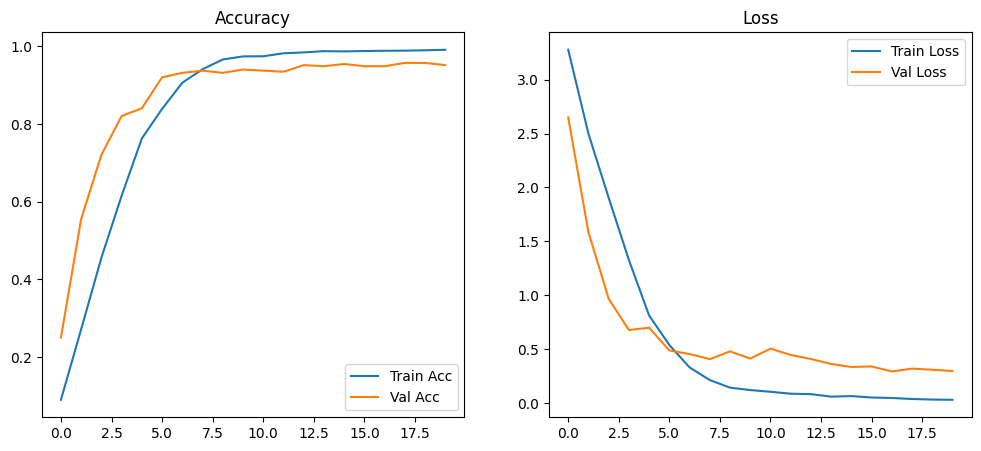

In [28]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend(); plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend(); plt.title("Loss")

plt.show()


## Confusion Matrix

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


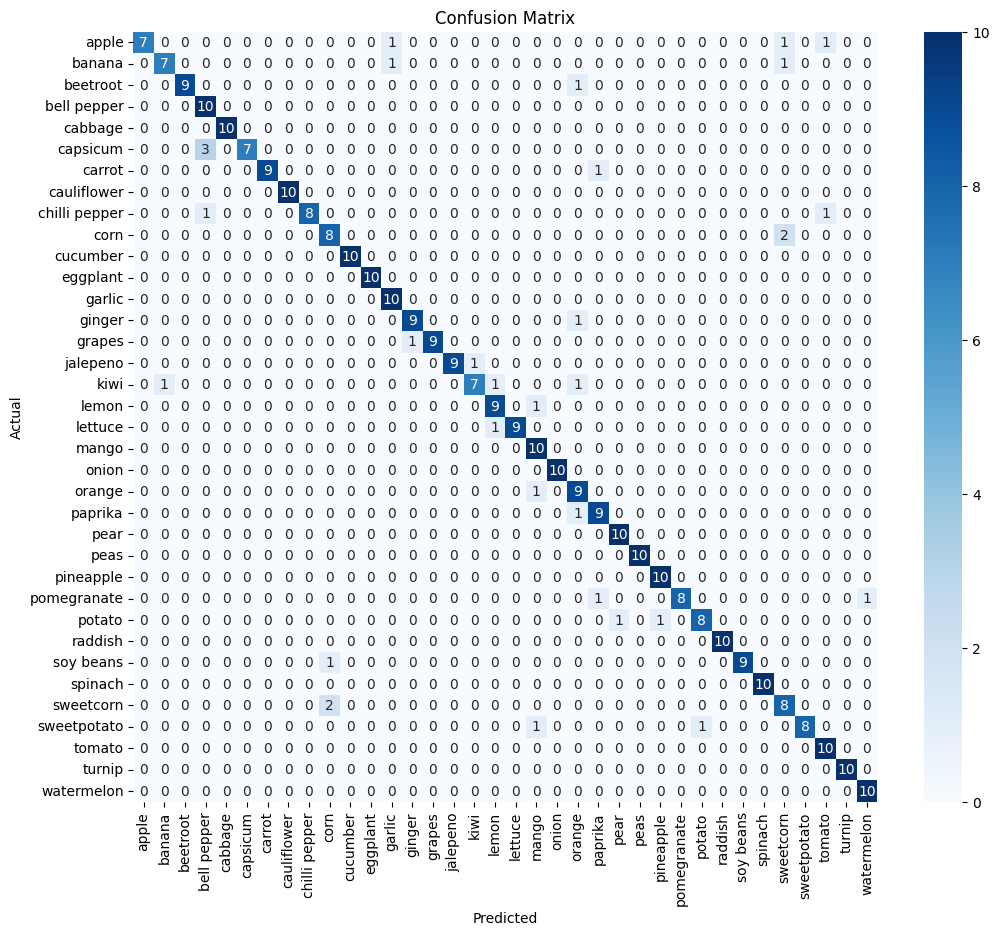

In [35]:
y_true = []
y_pred = []

for images, labels in test_ds_raw:
    preds = model.predict(images)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(labels.numpy())

cm = tf.math.confusion_matrix(y_true, y_pred, num_classes=num_classes)

plt.figure(figsize=(12,10))
sns.heatmap(
    cm,
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names,
    annot=True,
    fmt="d"
)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## Evaluate Model on Test Set

In [36]:
test_loss, test_acc = model.evaluate(test_ds)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9344 - loss: 0.4682
Test Loss: 0.2910510003566742
Test Accuracy: 0.9526462554931641


## Saving Model & Class Names


In [37]:
model.save("fruit_model.h5")

with open("class_names.json", "w") as f:
    json.dump(class_names, f)
